In [1]:
import pandas as pd
import csv
import numpy as np

In [2]:
assessment = ({"id_student":[0,1],"number":["12345","12344"]})
info = ({"id_student":[0,1],"status":["pass","pass"]})

df = pd.DataFrame(assessment)
dc = pd.DataFrame(info)

res = df.merge(dc, on=['id_student'], how='outer')
print(res)

   id_student number status
0           0  12345   pass
1           1  12344   pass


In [3]:
res.to_csv("new.csv", index=False)

In [4]:
#Check memory address
a = 257   # if a and b have same value between -5 and 256, then by definition there is only one object. 
b = 257   # So, they are same
print (hex(id(a)))
print (hex(id(b)))
print (a is b)
print (a,b)

0x1194b0270
0x1194b0370
False
257 257


In [31]:
data = ({"year":[2018,2018,2018,2019,2020,2019],"month":['Jan','Feb','Dec','Apr','Nov','Sep'],
        "BL_year":[2019,2018,2020,2019,2020,2018],"BL_month":['Jan','Mar','Dec','Sep','Dec','Jan']})

df = pd.DataFrame(data)
df

,BL_month,BL_year,month,year
0,Jan,2019,Jan,2018
1,Mar,2018,Feb,2018
2,Dec,2020,Dec,2018
3,Sep,2019,Apr,2019
4,Dec,2020,Nov,2020
5,Jan,2018,Sep,2019


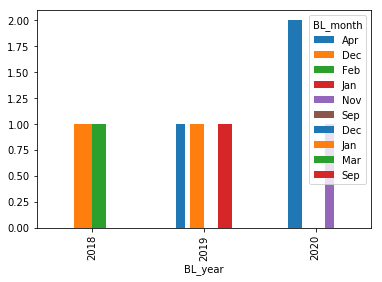

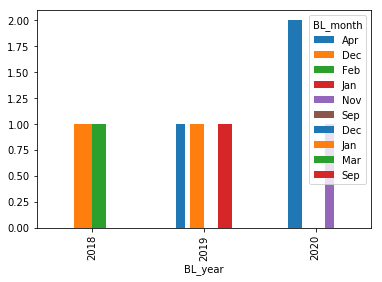

In [34]:
import matplotlib.pyplot as plt

# Create an axis object
fig, ax = plt.subplots()

# Define dataframes
df_Activity_count = df.sort_values(['year','month'],ascending = True).groupby('month')
df_Activity_count_BL = df.sort_values(['BL_year','BL_month'],ascending = True).groupby('BL_month')

# Plot using the axis object ax defined above
df_Activity_count['year'].value_counts().unstack(0).plot.bar(ax=ax)
df_Activity_count_BL['BL_year'].value_counts().unstack(0).plot.bar(ax=ax)

plt.show()

In [7]:
data = [
  {
    "id": 123456,
    "first_name": "John",
    "last_name": "Doe",
    "fields": [
      {
        "title": "ABC",
        "value": "123"
      },
      {
        "title": "DEF",
        "value": "456"
      }
    ]
  }
]

df = pd.DataFrame(data)
df

,fields,first_name,id,last_name
0,"[{'title': 'ABC', 'value': '123'}, {'title': '...",John,123456,Doe


In [8]:
from pandas.io.json import json_normalize
json_normalize(data, 'fields', ['id', 'first_name', 'last_name'])

,title,value,id,first_name,last_name
0,ABC,123,123456,John,Doe
1,DEF,456,123456,John,Doe


In [9]:
mailtext = ({"id":["1","2"],"text":['''"Gallagher, Keith G" <Keith.Gallagher@charter.com> 
Date: Friday, March 29, 2019 at 3:14 AM 
To: Lesley Kirchman <ljkirchman@actiontec.com>
Subject: Automatic reply: News Recap, March 29, 2019 Issue of CrossTalk  

Thank you for your email. I will be out of the office Thursday, March 28th 
through Monday, April 1st. I will respond to emails on Tuesday, April 2nd. 
If this is urgent please contact lisa.chiapetta@charter.com or  for National 
Account question or Stephen.thompson@charter.com or 309-557-1368 for 
National TeleSales 
inquiries.  
Thank you, Keith''','''"Wwwd" <ewr_r@example.ac.uk> 
Date: Friday, March 29, 2019 at 3:14 AM 
To: Lesley Kirchman <sadaasd@actiontec.com>
Subject: Automatic reply: News Recap, March 29, 2019 Issue of CrossTalk  

Thank you for your email. I will be out of the office Thursday, March 28th 
through Monday, April 1st. I will respond to emails on Tuesday, April 2nd. 
If this is urgent please contact prutt@charter.com or  for National 
Account question or Jerry.jack@charter.com or for 
National TeleSales 
inquiries.  
Thank you, Keith
''']})

dmail = pd.DataFrame(mailtext)
dmail

,id,text
0,1,"""Gallagher, Keith G"" <Keith.Gallagher@charter...."
1,2,"""Wwwd"" <ewr_r@example.ac.uk> \nDate: Friday, M..."


In [10]:
import re

info = []
for text in dmail["text"]:
    mail1 = re.findall("(\S+@\S+)",text)[:1]
    try:
        mail2 = re.findall("(\S+@\S+)",text)[1:]
        phone = re.findall("(\d{3}[\W]\d{3}[\W]\d{4})",text)
        mail1.insert(len(mail1),(", ".join(m for m in mail2)))
        mail1.insert(len(mail1),phone[0])
    except:
        pass
    info.append(mail1)
info

[['<Keith.Gallagher@charter.com>',
  '<ljkirchman@actiontec.com>, lisa.chiapetta@charter.com, Stephen.thompson@charter.com',
  '309-557-1368'],
 ['<ewr_r@example.ac.uk>',
  '<sadaasd@actiontec.com>, prutt@charter.com, Jerry.jack@charter.com']]

In [11]:
dmail[['Sender', 'Other_mails', 'Phone']] = pd.DataFrame(info) 
(dmail)

,id,text,Sender,Other_mails,Phone
0,1,"""Gallagher, Keith G"" <Keith.Gallagher@charter....",<Keith.Gallagher@charter.com>,"<ljkirchman@actiontec.com>, lisa.chiapetta@cha...",309-557-1368
1,2,"""Wwwd"" <ewr_r@example.ac.uk> \nDate: Friday, M...",<ewr_r@example.ac.uk>,"<sadaasd@actiontec.com>, prutt@charter.com, Je...",None


In [12]:
df = pd.DataFrame({'Column1': ["'Cat'", "'toy'", "'cat'"],
                   'Column2': ["'Bat'", "'flower'", "'bat'"],
                   'Column3': ["'xyz'", "'abc'", "'lmn'"]})
result_df = df.apply(lambda x: x.astype(str).str.lower()).drop_duplicates(subset=['Column1', 'Column2'], keep='first')
result_df

,Column1,Column2,Column3
0,'cat','bat','xyz'
1,'toy','flower','abc'


In [13]:
df = {'Cache-Control': 'must-revalidate', 'Content-Type': 'text/html; charset=UTF-8', 
       'Date': 'Thu, 16 May 2019 01:57:47 GMT', 'Expires': 'Sat, 26 Jul 1997 05:00:00 GMT', 
       'Pragma': 'no-cache', 'Server': 'Apache', 'Set-Cookie': 'targetValue-fox=a%3X4%3F%7vu%4t0%3Bs%3A32%3A%34242342jkjk2342342kj42%22%3G%9K; expires=Thu, 16-May-2019 03:57:47 GMT;',
       'Connection': 'keep-alive'}

df.get("Set-Cookie")

'targetValue-fox=a%3X4%3F%7vu%4t0%3Bs%3A32%3A%34242342jkjk2342342kj42%22%3G%9K; expires=Thu, 16-May-2019 03:57:47 GMT;'

In [14]:
dfA = pd.DataFrame({'filepath':[],'#deletions_histogram':[],'#deletions_myers':[]})
dfB = pd.read_csv("different_deletions.csv", index_col=False)
dfB

,filepath,#deletions_histogram,#deletions_myers
0,butterknife-compiler/src/test/java/butterknife...,2609,2572
1,butterknife-compiler/src/test/java/butterknife...,1833,1804
2,butterknife-compiler/src/main/java/butterknife...,1210,1193
3,butterknife-compiler/src/test/java/butterknife...,984,976
4,butterknife-compiler/src/main/java/butterknife...,875,844
5,butterknife-compiler/src/test/java/butterknife...,594,590
6,butterknife-compiler/src/test/java/butterknife...,652,639
7,butterknife/src/main/java/butterknife/internal...,324,325
8,butterknife-compiler/src/test/java/butterknife...,382,384
9,butterknife-compiler/src/test/java/butterknife...,458,453


In [15]:
dfC = pd.concat([dfA,dfB[:20]])
dfC

,#deletions_histogram,#deletions_myers,filepath
0,2609.0,2572.0,butterknife-compiler/src/test/java/butterknife...
1,1833.0,1804.0,butterknife-compiler/src/test/java/butterknife...
2,1210.0,1193.0,butterknife-compiler/src/main/java/butterknife...
3,984.0,976.0,butterknife-compiler/src/test/java/butterknife...
4,875.0,844.0,butterknife-compiler/src/main/java/butterknife...
5,594.0,590.0,butterknife-compiler/src/test/java/butterknife...
6,652.0,639.0,butterknife-compiler/src/test/java/butterknife...
7,324.0,325.0,butterknife/src/main/java/butterknife/internal...
8,382.0,384.0,butterknife-compiler/src/test/java/butterknife...
9,458.0,453.0,butterknife-compiler/src/test/java/butterknife...


In [16]:
dfB[20:40]

,filepath,#deletions_histogram,#deletions_myers
20,butterknife-compiler/src/test/java/butterknife...,149,141
21,butterknife/src/main/java/butterknife/internal...,96,95
22,butterknife-compiler/src/test/java/butterknife...,127,126
23,butterknife/src/test/java/butterknife/BindView...,40,26
24,butterknife-compiler/src/test/java/butterknife...,122,120
25,butterknife-compiler/src/test/java/butterknife...,120,118
26,butterknife-compiler/src/test/java/butterknife...,121,118
27,butterknife-compiler/src/test/java/butterknife...,114,113
28,butterknife-compiler/src/test/java/butterknife...,113,111
29,butterknife-compiler/src/test/java/butterknife...,113,111


In [17]:
temp = [['K98R', 'AB',34,'27-07-2010', '17-08-2013', '2008-03-01', '2011-05-02', 44],
['S33T','ES',55, '2009-07-23', '2012-03-12', '2010-09-17', '', 76]]
Data = pd.DataFrame(temp,columns=['ID','Initials','Age', 'Entry','Exit','Event1','Event2','Weight'])
Data

,ID,Initials,Age,Entry,Exit,Event1,Event2,Weight
0,K98R,AB,34,27-07-2010,17-08-2013,2008-03-01,2011-05-02,44
1,S33T,ES,55,2009-07-23,2012-03-12,2010-09-17,,76


In [18]:
import pandas as pd

txt_file = open("test_dns",'r')
text = txt_file.read().split('\n')
cols = []
cols1 = []
cols2 = []
for txt in text:
    if "-----" in txt:
        cols.append(txt)
    elif txt == "":
        pass
    else:
        if len(cols) == 1:
            cols1.append(txt)
        else:
            cols2.append(txt)
data = ({cols[0]:cols1, cols[1]:cols2})
df = pd.DataFrame(data)
print(df)

      ---------- dns01-sh01 ---------    ---------- dns02-sh02 ---------
0             zone "celina.com." IN {            zone "celina.com." IN {
1         zone "global.celina.com." {        zone "global.celina.com." {
2        zone "storage.celina.com." {       zone "storage.celina.com." {
3                 zone "gusain.com" {                zone "gusain.com" {
4                       zone "." IN {                      zone "." IN {
5        zone "10.in-addr.arpa." IN {       zone "10.in-addr.arpa." IN {
6    zone "99.139.in-addr.arpa." IN {   zone "99.139.in-addr.arpa." IN {
7   zone "190.158.in-addr.arpa." IN {  zone "190.158.in-addr.arpa." IN {
8       zone "172.in-addr.arpa." IN {      zone "172.in-addr.arpa." IN {
9            zone "localdomain." IN {           zone "localdomain." IN {
10             zone "localhost." IN {             zone "localhost." IN {
11  zone "0.0.127.in-addr.arpa." IN {  zone "0.0.127.in-addr.arpa." IN {
12      zone "255.in-addr.arpa." IN {      zone "25

In [19]:
import pandas as pd
from pandas.compat import StringIO

opened_file = open("test_dns",'r')
lines = opened_file.read().split('\n\n')

dfs = []
for i in lines:
    dfs.append(pd.read_fwf(StringIO(i)))

df = pd.concat(dfs, axis=1)

print(df)

      ---------- dns01-sh01 ---------    ---------- dns02-sh02 ---------
0             zone "celina.com." IN {            zone "celina.com." IN {
1         zone "global.celina.com." {        zone "global.celina.com." {
2        zone "storage.celina.com." {       zone "storage.celina.com." {
3                 zone "gusain.com" {                zone "gusain.com" {
4                       zone "." IN {                      zone "." IN {
5        zone "10.in-addr.arpa." IN {       zone "10.in-addr.arpa." IN {
6    zone "99.139.in-addr.arpa." IN {   zone "99.139.in-addr.arpa." IN {
7   zone "190.158.in-addr.arpa." IN {  zone "190.158.in-addr.arpa." IN {
8       zone "172.in-addr.arpa." IN {      zone "172.in-addr.arpa." IN {
9            zone "localdomain." IN {           zone "localdomain." IN {
10             zone "localhost." IN {             zone "localhost." IN {
11  zone "0.0.127.in-addr.arpa." IN {  zone "0.0.127.in-addr.arpa." IN {
12      zone "255.in-addr.arpa." IN {      zone "25

In [20]:
first_mon = pd.DataFrame({'id':[1,2,3],'marital_status':['Y','N','N'],'have_product':['Y','Y','N']})
second_mon = pd.DataFrame({'id':[1,2,3],'marital_status':['Y','Y','N'],'have_product':['Y','Y','Y']})
third_mon = pd.DataFrame({'id':[1,2,3],'marital_status':['Y','Y','Y'],'have_product':['Y','Y','Y']})

print (first_mon[['id','marital_status','have_product']])
print (second_mon[['id','marital_status','have_product']])
print (third_mon[['id','marital_status','have_product']])

   id marital_status have_product
0   1              Y            Y
1   2              N            Y
2   3              N            N
   id marital_status have_product
0   1              Y            Y
1   2              Y            Y
2   3              N            Y
   id marital_status have_product
0   1              Y            Y
1   2              Y            Y
2   3              Y            Y


In [21]:
merge_df = pd.merge(pd.merge(first_mon, second_mon, on='id'), third_mon, on='id')
merge_df.head()

,have_product_x,id,marital_status_x,have_product_y,marital_status_y,have_product,marital_status
0,Y,1,Y,Y,Y,Y,Y
1,Y,2,N,Y,Y,Y,Y
2,N,3,N,Y,N,Y,Y


In [22]:
merge_df['hp_changed'] = np.where(merge_df['have_product_x'] != merge_df['have_product_y'], 1, 0)
merge_df['ms_changed'] = np.where(merge_df['marital_status_x'] != merge_df['marital_status_y'], 1, 0)

In [23]:
print (merge_df[['id','marital_status_y','ms_changed','have_product_y','hp_changed']])

   id marital_status_y  ms_changed have_product_y  hp_changed
0   1                Y           0              Y           0
1   2                Y           1              Y           0
2   3                N           0              Y           1


In [24]:
df = pd.DataFrame({'A': ['ba t', 'ba ca t', 'foo', 'ba it'],'B': ['abc','abc', 'bar', 'xyz']})

replace_list=['ba','ba ca']

for i in replace_list:
    df=df.replace({'A': r'^({})'.format(i)}, {'A': ''}, regex=True)
df

,A,B
0,t,abc
1,ca t,abc
2,foo,bar
3,it,xyz


In [25]:
import pandas as pd

employee = pd.DataFrame({'id':[101,102,103,104,105],'name':['Jack','Anna','Steve','Andrew','Shelly'],'spv_id':
                           [105,0,101,103,0]})
print(employee)

    id    name  spv_id
0  101    Jack     105
1  102    Anna       0
2  103   Steve     101
3  104  Andrew     103
4  105  Shelly       0


In [26]:
employee['spv_name'] = employee.spv_id.map(employee.set_index('id')['name']).fillna('None')
employee

,id,name,spv_id,spv_name
0,101,Jack,105,Shelly
1,102,Anna,0,None
2,103,Steve,101,Jack
3,104,Andrew,103,Steve
4,105,Shelly,0,None


In [28]:
raw_data = {'ID': ['A1', 'B1', 'C1', 'D1'], 
  'Domain': ['Finance', 'IT', 'IT', 'Finance'], 
  'Target': [1, 2, 3, 0.9], 
  'Criteria':['<=', '<=', '>=', '>='],
  "1/01":[0.9, 1.1, 2.1, 1],
  "1/02":[0.4, 0.3, 0.5, 0.9], 
  "1/03":[1, 1, 4, 1.1], 
  "1/04":[0.7, 0.7, 0.1, 0.7],
  "1/05":[0.7, 0.7, 0.1, 1], 
  "1/06":[0.9, 1.1, 2.1, 0.6],}

df = pd.DataFrame(raw_data, columns = ['ID', 'Domain', 'Target','Criteria', '1/01', 
  '1/02','1/03', '1/04','1/05', '1/06'])

df

,ID,Domain,Target,Criteria,1/01,1/02,1/03,1/04,1/05,1/06
0,A1,Finance,1.0,<=,0.9,0.4,1.0,0.7,0.7,0.9
1,B1,IT,2.0,<=,1.1,0.3,1.0,0.7,0.7,1.1
2,C1,IT,3.0,>=,2.1,0.5,4.0,0.1,0.1,2.1
3,D1,Finance,0.9,>=,1.0,0.9,1.1,0.7,1.0,0.6


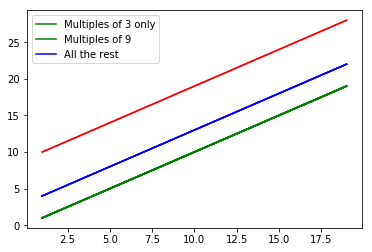

In [1]:
import matplotlib.pyplot as plt

for i in range(1,20):
    if i%3==0 and i%9!=0:
        plt.plot(range(1,20),[i+3 for i in range(1,20)], c='b')
    elif i%9==0:
        plt.plot(range(1,20),[i+9 for i in range(1,20)], c='r')
    else:
        plt.plot(range(1,20),range(1,20), c='g')
plt.legend(['Multiples of 3 only', 'Multiples of 9', 'All the rest'])
plt.show()

# Self-joining table

In [82]:
import pandas as pd

data = {'child':['Joe','Anna','Robert','Anna','Steffani','Bob','Rea','Dani','Dani','Selma','John','Kevin'],
             'parents':['Steffani','Bob','-','Steffani','Dani','Selma','Anna','Selma','John','Kevin','-','Robert'],
            }
df = pd.DataFrame(data)
df

,child,parents
0,Joe,Steffani
1,Anna,Bob
2,Robert,-
3,Anna,Steffani
4,Steffani,Dani
5,Bob,Selma
6,Rea,Anna
7,Dani,Selma
8,Dani,John
9,Selma,Kevin


In [83]:
df2 = pd.merge(df, df, left_on='parents', right_on='child', how='left').fillna('-')
df2 = df2[['child_x','parents_x','parents_y']]
df2.columns = ['child','parents','A']

In [84]:
df3 = pd.merge(df2, df, left_on='A', right_on='child', how='left').fillna('-')
df3 = df3[['child_x','parents_x','A','parents_y']]
df3.columns = ['child','parents','A','B']

In [85]:
df4 = pd.merge(df3, df, left_on='B', right_on='child', how='left').fillna('-')
df4 = df4[['child_x','parents_x','A','B','parents_y']]
df4.columns = [['child','parents','A','B','C']]
df4

,child,parents,A,B,C
0,Joe,Steffani,Dani,Selma,Kevin
1,Joe,Steffani,Dani,John,-
2,Anna,Bob,Selma,Kevin,Robert
3,Robert,-,-,-,-
4,Anna,Steffani,Dani,Selma,Kevin
5,Anna,Steffani,Dani,John,-
6,Steffani,Dani,Selma,Kevin,Robert
7,Steffani,Dani,John,-,-
8,Bob,Selma,Kevin,Robert,-
9,Rea,Anna,Bob,Selma,Kevin


### Another method

In [86]:
def reduce(function, iterable, initializer=None):
    it = iter(iterable)
    if initializer is None:
        value = next(it)
    else:
        value = initializer
    for element in it:
        value = function(value, element)
    return value

In [87]:
def proc_build(x,y):
    temp = (pd.merge(x, y, left_on='parents', right_on='child', 
                     how='left', suffixes=['_',''])                     
              .fillna('-'))

    return temp

In [88]:
final_df = (reduce(proc_build, [df] * 6)
               .set_axis(['child', 'parents',
                          'child1', 'A', 
                          'child2', 'B',
                          'child3', 'C',
                          'child4', 'D',
                          'child5', 'E'], axis='columns', inplace=False)
               .reindex(['child', 'parents'] + list('ABCDE'), axis='columns')
           )

final_df

,child,parents,A,B,C,D,E
0,Joe,Steffani,Dani,Selma,Kevin,Robert,-
1,Joe,Steffani,Dani,John,-,-,-
2,Anna,Bob,Selma,Kevin,Robert,-,-
3,Robert,-,-,-,-,-,-
4,Anna,Steffani,Dani,Selma,Kevin,Robert,-
5,Anna,Steffani,Dani,John,-,-,-
6,Steffani,Dani,Selma,Kevin,Robert,-,-
7,Steffani,Dani,John,-,-,-,-
8,Bob,Selma,Kevin,Robert,-,-,-
9,Rea,Anna,Bob,Selma,Kevin,Robert,-


In [184]:
df_withId = df.copy()
df_withId = df_withId[['child']].drop_duplicates(subset='child', keep='first')
df_withId['id'] = [x for x in range(len(df_withId))]

add_id = pd.DataFrame([['-',str(len(df_withId))]], columns=['child','id'])
df_withId = pd.concat([df_withId, add_id])
df_withId

,child,id
0,Joe,0
1,Anna,1
2,Robert,2
4,Steffani,3
5,Bob,4
6,Rea,5
7,Dani,6
9,Selma,7
10,John,8
11,Kevin,9


In [185]:
df_relation = pd.merge(final_df, df_withId, left_on=['child'],
                       right_on=['child'], how='left').fillna('-')
df_relation.rename(columns={'id':'child_id'}, inplace=True)
df_relations = pd.merge(df_relation, df_withId, left_on=['parents'],
                       right_on=['child'], how='left').fillna('-')
df_relations = df_relations[['child_id','id']]
df_relations.columns = ['child_id','parents_id']
df_relations

,child_id,parents_id
0,0,3
1,0,3
2,1,4
3,2,10
4,1,3
5,1,3
6,3,6
7,3,6
8,4,7
9,5,1


In [186]:
labels = df_withId['child'].to_list()
# for i in range(6):
labels.append('')
labels

['Joe',
 'Anna',
 'Robert',
 'Steffani',
 'Bob',
 'Rea',
 'Dani',
 'Selma',
 'John',
 'Kevin',
 '-',
 '']

In [187]:
color = ['#F27420','#4994CE','#9ABC13','#7FC241','#D3D3D3','#8A5988',
         '#449E9E','#D3D3D3','#92742A','#9AECC3','#BFC241','#A994CE']
link_color = ['rgba(253, 160, 212, 0.5)','rgba(242, 116, 32, 1)','rgba(253, 160, 212, 0.5)',
              'rgba(219, 233, 100, 0.5)','rgba(73, 148, 206, 1)','rgba(219, 233, 100, 0.5)',
              'rgba(250, 188, 19, 1)','rgba(250, 188, 19, 0.5)','rgba(250, 188, 19, 0.5)',
              'rgba(127, 194, 65, 1)','rgba(127, 194, 65, 0.5)','rgba(127, 194, 65, 0.5)']

In [188]:
print(len(df_relations))
print(len(labels))

17
12


In [189]:
df_sankey = df_relations.groupby(['child_id','parents_id']).size().reset_index(name='value')
print(len(df_sankey))
df_sankey['color'] = color
df_sankey['label'] = labels
df_sankey['link_color'] = link_color
df_sankey.columns = ['source','target','value','color','label','link_color']
df_sankey

12


,source,target,value,color,label,link_color
0,0,3,2,#F27420,Joe,"rgba(253, 160, 212, 0.5)"
1,1,3,2,#4994CE,Anna,"rgba(242, 116, 32, 1)"
2,1,4,1,#9ABC13,Robert,"rgba(253, 160, 212, 0.5)"
3,2,10,1,#7FC241,Steffani,"rgba(219, 233, 100, 0.5)"
4,3,6,2,#D3D3D3,Bob,"rgba(73, 148, 206, 1)"
5,4,7,1,#8A5988,Rea,"rgba(219, 233, 100, 0.5)"
6,5,1,3,#449E9E,Dani,"rgba(250, 188, 19, 1)"
7,6,7,1,#D3D3D3,Selma,"rgba(250, 188, 19, 0.5)"
8,6,8,1,#92742A,John,"rgba(250, 188, 19, 0.5)"
9,7,9,1,#9AECC3,Kevin,"rgba(127, 194, 65, 1)"


In [190]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [191]:
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 5,
      thickness = 5,
      line = dict(
        color = "black",
        width = 0
      ),
      label =  df_sankey['label'].dropna(axis=0, how='any'),
      color = df_sankey['color']
    ),
    link = dict(
      source = df_sankey['source'].dropna(axis=0, how='any'),
      target = df_sankey['target'].dropna(axis=0, how='any'),
      value = df_sankey['value'].dropna(axis=0, how='any'),
      color = df_sankey['link_color'].dropna(axis=0, how='any'),
  )
)

layout =  dict(
    title = "Relationship of family",
    height = 500,
    font = dict(
      size = 10
    ),    
)

fig = dict(data=[data_trace], layout=layout)
iplot(fig, validate=False)